In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
from matplotlib import pyplot as plt

import numpy as np

In [3]:
cd ..

C:\Users\endar\Documents\projects\current\auttitude\autti


In [4]:
import auttitude as at
from auttitude.plot import ProjectionPlot

In [5]:
from math import radians, degrees

In [6]:
at.sphere_plane(at.dcos_plane(((120,30), (80, 60))))

array([[ 120.,   30.],
       [  80.,   60.]])

In [7]:
data_lines = at.VectorSet(at.dcos_line(((60, 45), (200, 60), (250, 15))))

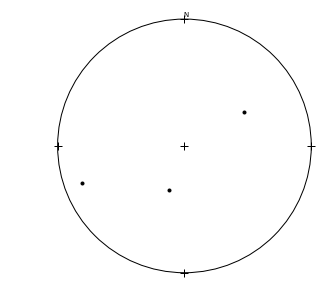

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(data_lines)

In [ ]:
x = at.Plane(at.dcos_plane((60, 45)))
x_ = at.Line(at.dcos_rake((60, 45, 30)))
y = at.Plane(at.dcos_plane((200, 60)))
z = at.Plane(at.dcos_plane((135, 60)))

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(x)
plot.as_lines(x.great_circle())
plot.as_points(x_)
degrees(x.direction_vector.angle(x_))

29.99999999999998

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(x)
plot.as_points(y, marker='*', ms=12, c='r')
plot.as_points(x.rotation_matrix(30).dot(y), marker='*', ms=12, c='b')
plot.as_lines(x.small_circle(x.angle(y)))
plot.as_lines(x.arc(y))

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(x)
plot.as_lines(x.great_circle())
plot.as_points(z, marker='*', ms=12, c='r')
plot.as_points(x.rejection_matrix.dot(z), marker='*', ms=12, c='b')
plot.as_lines(x.intersect(z).great_circle())

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = ProjectionPlot(ax)
plot.clear_diagram()
a_ = at.Line(at.dcos_line((0, 45)))
b_ = at.Line(at.dcos_line((80, 60)))
plot.as_points(a_)
plot.as_lines(a_.small_circle(radians(30.)))
plot.as_points(b_)
plot.as_lines(b_.small_circle(radians(45.)))
intersection = at.math.small_circle_intersection(a_, radians(30), b_, radians(45))
plot.as_points(intersection)

In [ ]:
data_planes = at.PlaneSet(at.dcos_plane(((60, 60), (200, 60), (250, 15))))

fig, ax = plt.subplots(figsize=(5, 5))
plot = ProjectionPlot(ax)
plot.clear_diagram()
#plot.as_points(data_planes)
plot.as_lines(data_planes.great_circle(), color='r')
plot.as_lines(data_lines.great_circle(), color='b')
plot.as_points(data_planes.intersect(data_lines))

In [ ]:
import csv
with open("Examples/fractures.txt", "r") as csvfile:
    data_reader = csv.reader(csvfile, delimiter=" ")
    translated_data = [at.translate_attitude(direction, dip, strike=True) for (direction, dip) in data_reader]
    data_fractures = at.PlaneSet(at.dcos_plane(translated_data))

fig, ax = plt.subplots(figsize=(5, 5))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(data_fractures)

In [ ]:
data = at.PlaneSet(at.dcos_plane(np.loadtxt("Examples/tocher.txt")))

fig, ax = plt.subplots(figsize=(5, 5))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(data)
plot.as_lines(data.great_circle())

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = ProjectionPlot(ax, rotation=(-22, -10, 30))
data = at.PlaneSet(at.dcos_plane(np.loadtxt("Examples/tocher.txt")))
plot.clear_diagram()
plot.as_points(data, ms=.5)
fit_plane = data.stats.eigenvectors[2]
plot.as_points(fit_plane, marker='*', ms=12, c='r')
plot.as_lines(fit_plane.great_circle(), linewidths=2, color='r')
c = plot.as_contours(at.DEFAULT_GRID.grid, data.count_kamb(), len(data), cmap='terrain')
plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)

In [ ]:
from auttitude.applications import stress

angelier = np.loadtxt("Examples/Angelier_1979.txt", usecols=(0, 1, 2, 3), delimiter='\t')
angelier[:,0] += 90

angelier_planes = at.PlaneSet(at.dcos_plane(angelier[:,:2]))
angelier_lines = at.LineSet(at.dcos_line(angelier[:,2:]))

stress_matrix, residuals = stress.michael(angelier_planes, angelier_lines)
stress_directions, (s1, s2, s3) = stress.principal_stresses(stress_matrix)
print("Phi=", (s2-s3)/(s1-s3))

angelier_dihedra = stress.angelier_graphical(angelier_planes, angelier_lines)

fig, ax = plt.subplots(figsize=(10, 10))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(angelier_lines)
plot.as_lines(angelier_planes.great_circle())
plot.as_points(stress_directions[0], marker='*', ms=12, c='r') #compressive
plot.as_points(stress_directions[1], marker='*', ms=12, c='g') #intermediate
plot.as_points(stress_directions[2], marker='*', ms=12, c='c') #distensive
plot.as_arrow_on_pole(angelier_planes, angelier_lines, True)
c = plot.as_contours(at.DEFAULT_GRID.grid, angelier_dihedra, len(angelier_planes), 20, cmap='jet')
plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)

In [ ]:
dixie = np.loadtxt("Examples/dixie.txt", skiprows=1, delimiter=' ')
dixie[:, 2] *= -1

dixie_planes = at.PlaneSet(at.dcos_plane(dixie[:,:2]))
dixie_lines = at.LineSet(at.dcos_rake(dixie))

stress_matrix, residuals = stress.michael(dixie_planes, dixie_lines)
stress_directions, (s1, s2, s3) = stress.principal_stresses(stress_matrix)
print("Phi=", (s2-s3)/(s1-s3))

dixie_dihedra = stress.angelier_graphical(dixie_planes, dixie_lines)

fig, ax = plt.subplots(figsize=(10, 10))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(dixie_lines)
plot.as_points(dixie_planes)
plot.as_lines(dixie_planes.great_circle())
plot.as_points(stress_directions[0], marker='*', ms=12, c='r') #compressive
plot.as_points(stress_directions[1], marker='*', ms=12, c='g') #intermediate
plot.as_points(stress_directions[2], marker='*', ms=12, c='c') #distensive
#plot.plot_slickenlines(dixie_planes, dixie_lines, True)
plot.as_arrow_on_pole(dixie_planes, dixie_lines, True)
c = plot.as_contours(at.DEFAULT_GRID.grid, dixie_dihedra, len(dixie_planes), 20, cmap='jet')
plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)

In [ ]:
normal = np.loadtxt("Examples/normal_faults.txt", usecols=(0, 1, 2, 3), delimiter='\t')

normal_planes = at.PlaneSet(at.dcos_plane(normal[:,:2]))
normal_lines = at.LineSet(at.dcos_line(normal[:,2:]))

stress_matrix, residuals = stress.michael(normal_planes, normal_lines)
stress_directions, (s1, s2, s3) = stress.principal_stresses(stress_matrix)
print("Phi=", (s2-s3)/(s1-s3))

normal_dihedra = stress.angelier_graphical(normal_planes, normal_lines)

fig, ax = plt.subplots(figsize=(10, 10))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(normal_lines)
plot.as_lines(normal_planes.great_circle())
plot.as_points(stress_directions[0], marker='*', ms=12, c='r') #compressive
plot.as_points(stress_directions[1], marker='*', ms=12, c='g') #intermediate
plot.as_points(stress_directions[2], marker='*', ms=12, c='c') #distensive
plot.as_arrow_on_pole(normal_planes, normal_lines, True)
c = plot.as_contours(at.DEFAULT_GRID.grid, normal_dihedra, len(normal_planes), 20, cmap='jet')
plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)

In [ ]:
np.random.seed(0)
fisher_data = at.stats.sample_fisher(x, 50, 500)
print(fisher_data.stats.fisher_k)

fig, ax = plt.subplots(figsize=(10, 10))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(fisher_data)
plot.as_lines(fisher_data.great_circle())

In [ ]:
np.random.seed(0)
uniform_data = at.stats.sample_uniform(500)

fig, ax = plt.subplots(figsize=(10, 10))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(uniform_data)
plot.as_lines(uniform_data.great_circle())

In [ ]:
#%%time
#random_500 = at.sample.uniform_sample(500000)
#grid_500 = random_500.count_fisher(100)
#fig, ax = plt.subplots(figsize=(10, 10))
#plot = ProjectionPlot(ax)
#plot.clear_diagram()

#plot.as_points(random_500.stats.eigenvectors[0], marker='*', ms=12, c='r')
#plot.as_points(random_500.stats.eigenvectors[1], marker='*', ms=12, c='g')
#plot.as_points(random_500.stats.eigenvectors[2], marker='*', ms=12, c='c')

#c = plot.as_contours(at.DEFAULT_GRID.grid, grid_500[:,0], len(random_500), cmap='terrain')
#plt.colorbar(c, shrink=.6, orientation='horizontal', pad=.05)

In [ ]:
%%time
np.random.seed(0)
random_500 = at.stats.sample_uniform(1000000)
fig, ax = plt.subplots(figsize=(10, 10))
plot = ProjectionPlot(ax)
plot.clear_diagram()
plot.as_points(random_500, ms=.05, rasterized=True)